Initialisation les bibliothèques

In [41]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/Fourmis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/Fourmis


In [91]:
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
import time
import copy as cp
import numpy as np
from google.colab.patches import cv2_imshow

In [90]:
def dist(p1, p2):
  return np.linalg.norm(np.array(p1)-np.array(p2))

def verif(p, tab, seuil_iden = 5, seuile_loin=10):
  for pt in tab:
    if dist(p, pt) <= seuil_iden:
      return True
  return False

# Première vue sur les images
Photo de la boîte

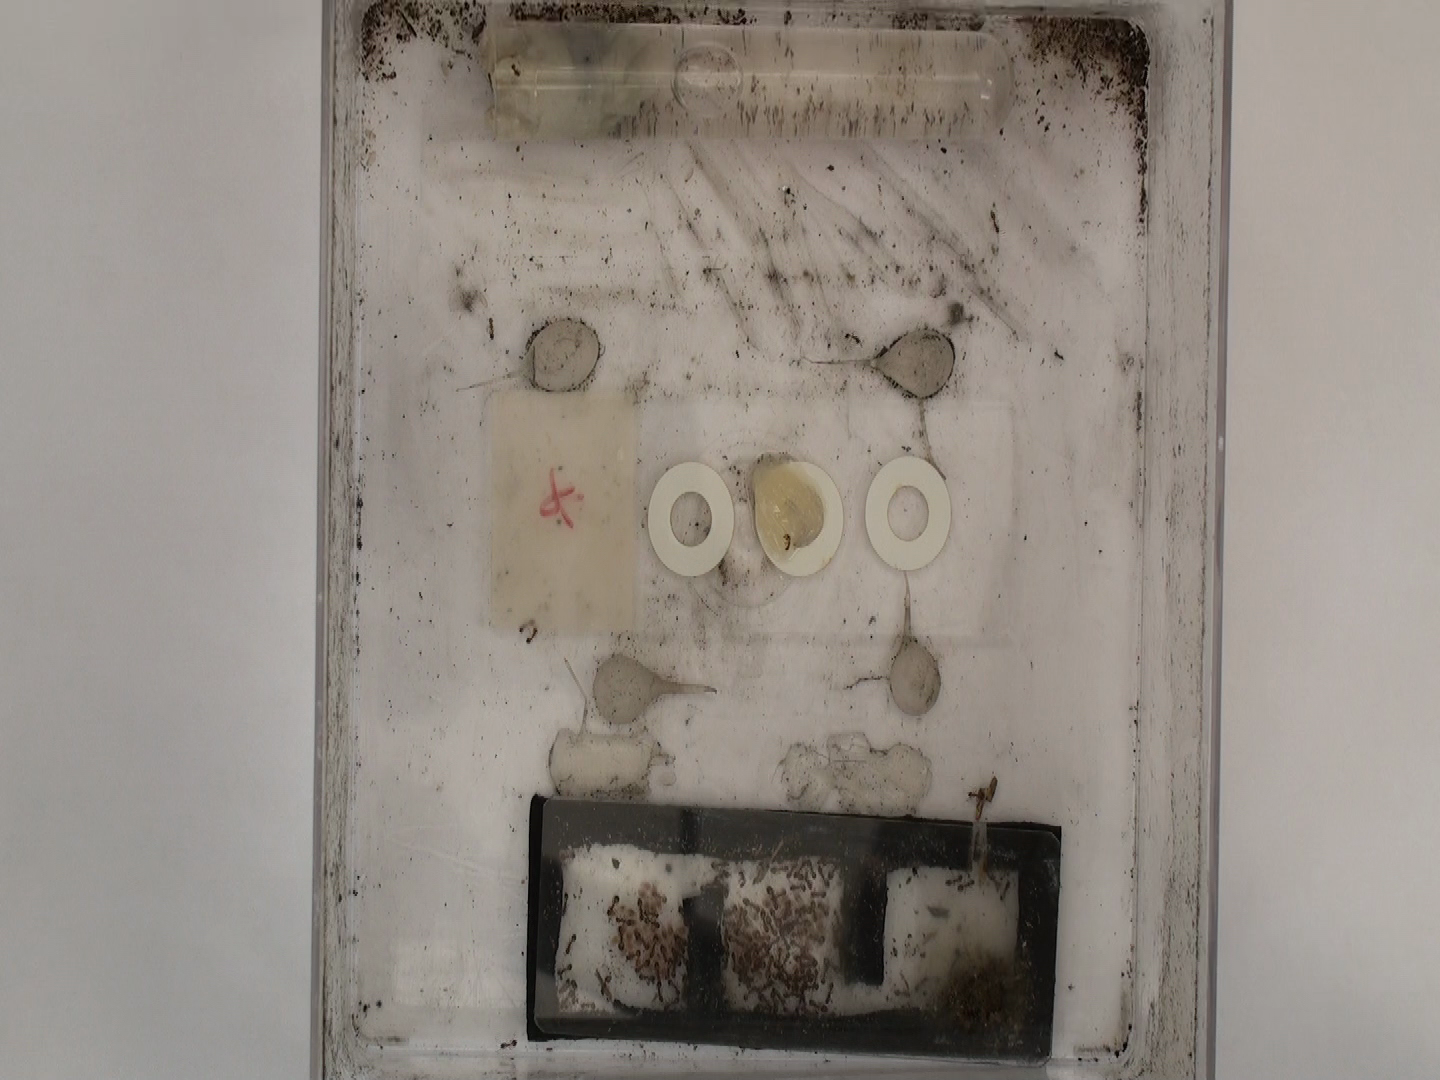

In [4]:
img = cv.imread("img/img1.png")
cv2_imshow(img)

Photo d'une fourmi dans le nid

In [6]:
template = cv.imread("data_img_fourmis/Fourmi1.png")
cv2_imshow(template)

# Template Matching

Appliquer le template matching pour trouver l'endroit où la similarité entre l'image de la fourmi et celle de la boîte est la plus haute.

In [7]:
resultat = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_location, max_location = cv.minMaxLoc(resultat)

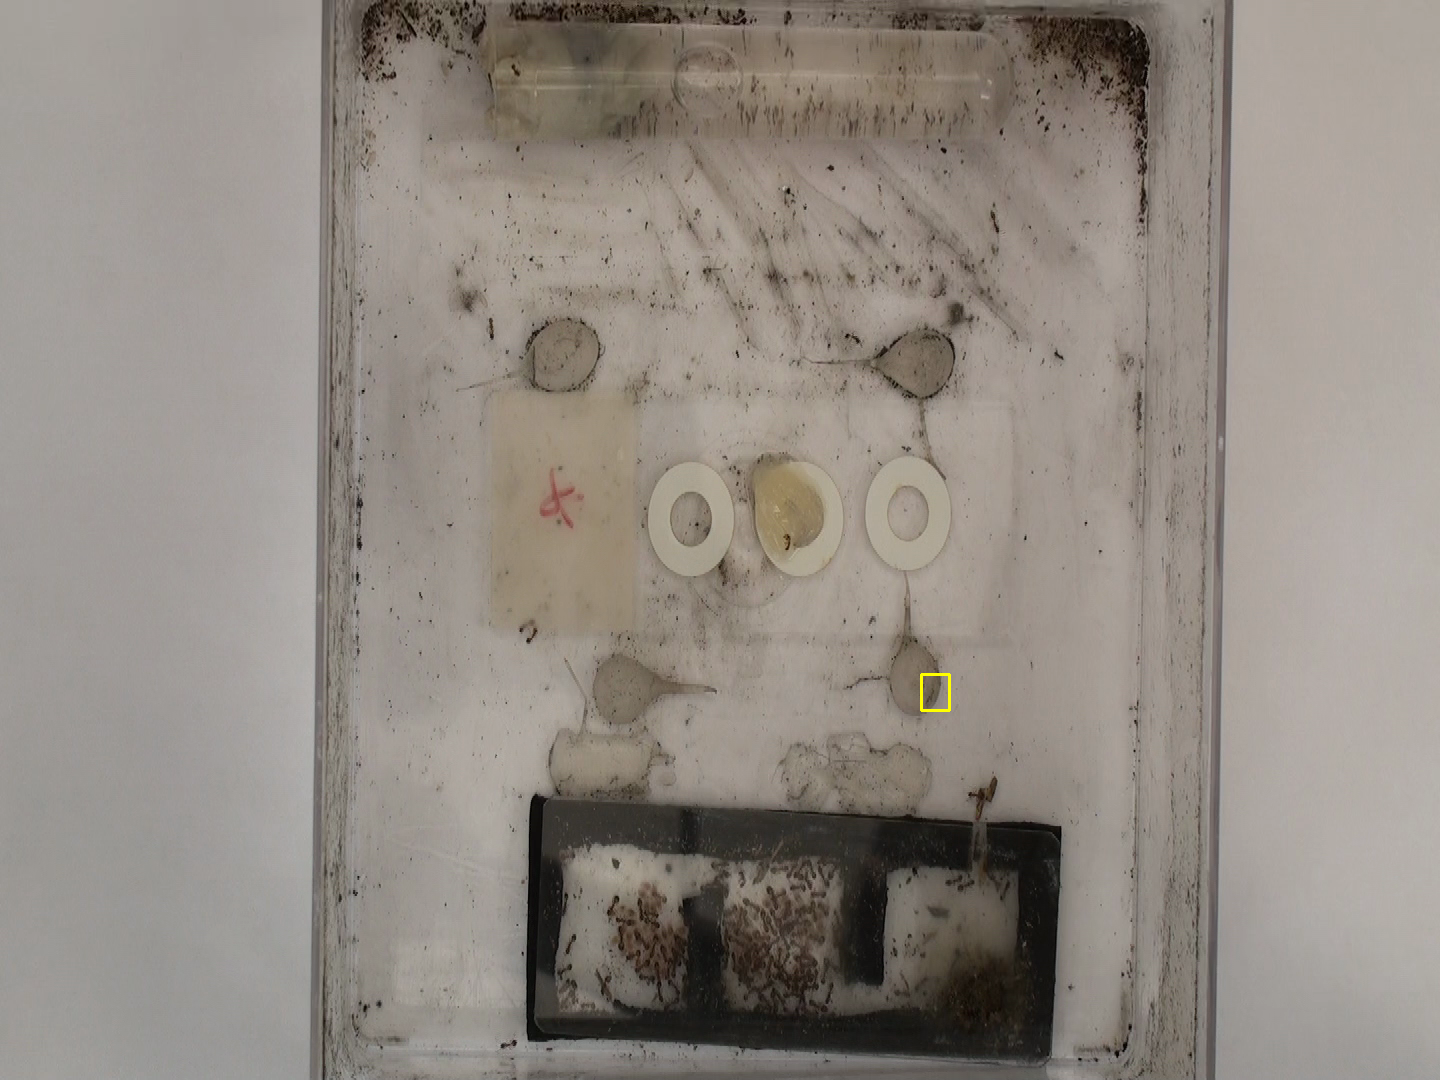

In [8]:
w, h = template.shape[1], template.shape[0]
cv.rectangle(img, max_location, (max_location[0] +w, max_location[1] +h ), (0,255,255), 2)
cv2_imshow(img)

Prenons l'image du nid uniquement

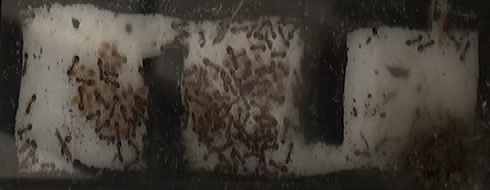

In [9]:
img = cv.imread("img/img2.png")
cv2_imshow(img)

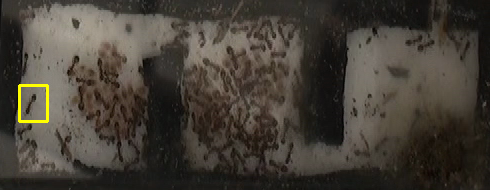

In [10]:
resultat = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_location, max_location = cv.minMaxLoc(resultat)
w, h = template.shape[1], template.shape[0]
cv.rectangle(img, max_location, (max_location[0] +w, max_location[1] +h ), (0,255,255), 2)
cv2_imshow(img)

Ajouter seuillage

0.6318740844726562
Trouvé avec seuil 0.6: 2


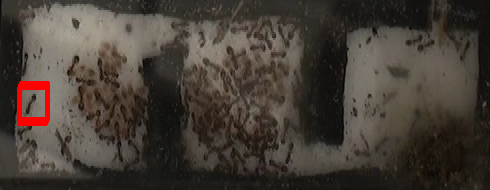

In [14]:
img = cv.imread("img/img2.png")
template = cv.imread("data_img_fourmis/Fourmi1.png")

resultat = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_location, max_location = cv.minMaxLoc(resultat)
print(max_val)
threshold = 0.6
loc = np.where( resultat >= threshold)
print(f"Trouvé avec seuil {threshold}:",len(loc))
for pt in zip(*loc[::-1]):
  cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2_imshow(img)

# Template matching et Pivoter 

0.7578202486038208


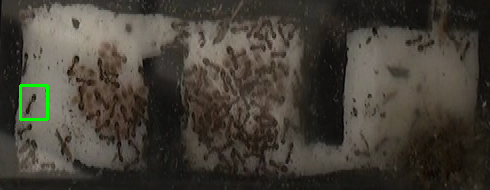

In [25]:
imgOri = cv.imread("img/img2.png")
templateOri = cv.imread("data_img_fourmis/Fourmi1.png")

img = cp.deepcopy(imgOri)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7),0) #reduction de bruit

template = cp.deepcopy(templateOri)
template = cv.cvtColor(template,cv.COLOR_BGR2GRAY)
template_blur = cv.GaussianBlur(template, (7,7),0)
deb = time.time()

taille = np.linspace(0.97,1.03,5)[::-1]

tab_point = []


for scale in taille:
  nv_img = imutils.resize(template_blur, width = int(template.shape[1]*scale))
  for degree in np.arange(0,360,15):
    im_pivote = imutils.rotate(nv_img, degree)
    h, w= im_pivote.shape

    res = cv.matchTemplate(blur, im_pivote, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_location, max_location = cv.minMaxLoc(res)
    thres = 0.73

    location = np.where(res>=thres)

    if location:
      for point in zip(*location[::-1]):
        point = list(point)
        if not verif(point, tab_point):
          print(max_val)
          tab_point.append(point)
          cv.rectangle(imgOri, point, (point[0] +w, point[1]+h), (0,255,0),2)
fin = time.time()
#print(fin-deb)
cv2_imshow(imgOri)

Tester sur une fourmi qui bouge souvent

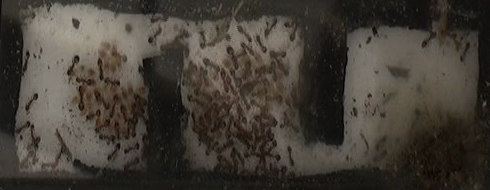

In [34]:
imgOri = cv.imread("img/img200.png")
cv2_imshow(imgOri)

In [105]:
templateOri = cv.imread("data_img_fourmis/Fourmi2.png")
cv2_imshow(templateOri)

0.9576643705368042


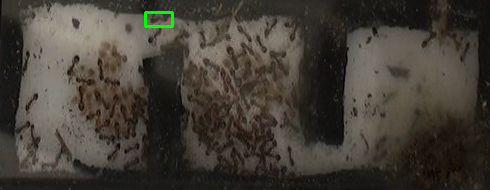

In [50]:
imgOri = cv.imread("img/img200.png")
img = cp.deepcopy(imgOri)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7),0) #reduction de bruit

template = cp.deepcopy(templateOri)
template = cv.cvtColor(template,cv.COLOR_BGR2GRAY)
template_blur = cv.GaussianBlur(template, (7,7),0)
deb = time.time()

taille = np.linspace(0.97,1.03,5)[::-1]

tab_point = []


for scale in taille:
  nv_img = imutils.resize(template_blur, width = int(template.shape[1]*scale))
  for degree in np.arange(0,360,15):
    im_pivote = imutils.rotate(nv_img, degree)
    h, w= im_pivote.shape

    res = cv.matchTemplate(blur, im_pivote, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_location, max_location = cv.minMaxLoc(res)
    thres = 0.9

    location = np.where(res>=thres)

    if location:
      for point in zip(*location[::-1]):
        point = list(point)
        if not verif(point, tab_point):
          print(max_val)
          tab_point.append(point)
          cv.rectangle(imgOri, point, (point[0] +w, point[1]+h), (0,255,0),2)
fin = time.time()
#print(fin-deb)
cv2_imshow(imgOri)

0.9033800363540649


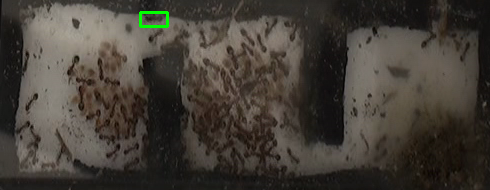

In [106]:
imgOri = cv.imread("img/img210.png")
img = cp.deepcopy(imgOri)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7),0) #reduction de bruit

template = cp.deepcopy(templateOri)
template = cv.cvtColor(template,cv.COLOR_BGR2GRAY)
template_blur = cv.GaussianBlur(template, (7,7),0)
deb = time.time()

taille = np.linspace(0.97,1.03,5)[::-1]

tab_point = []

for scale in taille:
  nv_img = imutils.resize(template_blur, width = int(template.shape[1]*scale))
  for degree in np.arange(0,360,15):
    im_pivote = imutils.rotate(nv_img, degree)
    h, w= im_pivote.shape

    res = cv.matchTemplate(blur, im_pivote, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_location, max_location = cv.minMaxLoc(res)
    thres = 0.9

    location = np.where(res>=thres)

    if location:
      for point in zip(*location[::-1]):
        point = list(point)
        if not verif(point, tab_point):
          print(max_val)
          tab_point.append(point)
          cv.rectangle(imgOri, point, (point[0] +w, point[1]+h), (0,255,0),2)
          template_f2_210 = blur[point[1]:point[1]+h,point[0]:point[0] +w]
fin = time.time()
#print(fin-deb)
cv2_imshow(imgOri)

In [107]:
cv2_imshow(template_f2_210) # image de la fourmi a la frame 210

0.8880217671394348
0.8880217671394348
0.8880217671394348
0.8880217671394348
0.8475674390792847
0.8907487392425537
0.8907487392425537
0.8535138964653015
0.8537828922271729


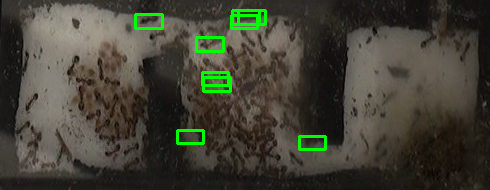

In [57]:
imgOri = cv.imread("img/img220.png")
img = cp.deepcopy(imgOri)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7),0) #reduction de bruit

template = cp.deepcopy(templateOri)
template = cv.cvtColor(template,cv.COLOR_BGR2GRAY)
template_blur = cv.GaussianBlur(template, (7,7),0)
deb = time.time()

taille = np.linspace(0.97,1.03,5)[::-1]

tab_point = []

def dist(p1, p2):
  return np.linalg.norm(np.array(p1)-np.array(p2))

def verif(p, tab, seuil = 5):
  for pt in tab:
    if dist(p, pt) <= seuil:
      return True
  return False

for scale in taille:
  nv_img = imutils.resize(template_blur, width = int(template.shape[1]*scale))
  for degree in np.arange(0,360,15):
    im_pivote = imutils.rotate(nv_img, degree)
    h, w= im_pivote.shape

    res = cv.matchTemplate(blur, im_pivote, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_location, max_location = cv.minMaxLoc(res)
    thres = 0.84

    location = np.where(res>=thres)

    if location:
      for point in zip(*location[::-1]):
        point = list(point)
        if not verif(point, tab_point):
          print(max_val)
          tab_point.append(point)
          cv.rectangle(imgOri, point, (point[0] +w, point[1]+h), (0,255,0),2)
fin = time.time()
#print(fin-deb)
cv2_imshow(imgOri)

Si on prendre l'image de la dernière fois on l'a vue

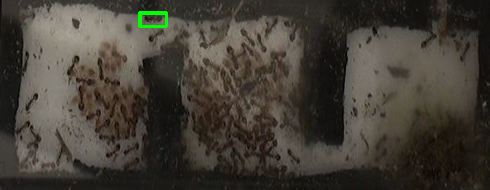

In [89]:
imgOri = cv.imread("img/img211.png")
img = cp.deepcopy(imgOri)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img, (7,7),0) #reduction de bruit


deb = time.time()

taille = np.linspace(0.97,1.03,5)[::-1]

tab_point = []


for scale in taille:
  nv_img = imutils.resize(template_f2_210, width = int(template.shape[1]*scale))
  for degree in np.arange(0,360,15):
    im_pivote = imutils.rotate(nv_img, degree)
    h, w= im_pivote.shape

    res = cv.matchTemplate(blur, im_pivote, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_location, max_location = cv.minMaxLoc(res)
    if verif(max_location, tab_point) or tab_point == []:
      tab_point.append(point)
      cv.rectangle(imgOri, max_location, (max_location[0] +w, max_location[1]+h), (0,255,0),2)
      
fin = time.time()
#print(fin-deb)
cv2_imshow(imgOri)

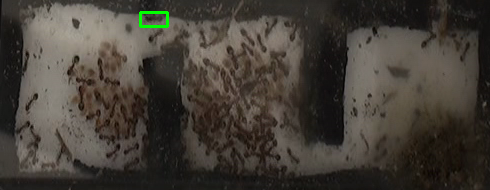

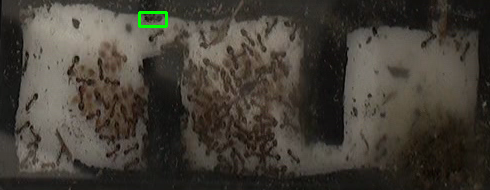

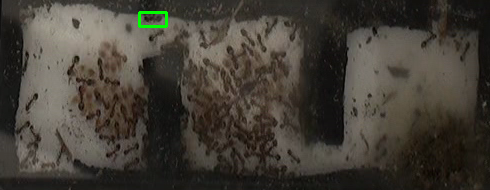

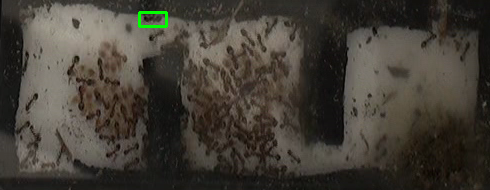

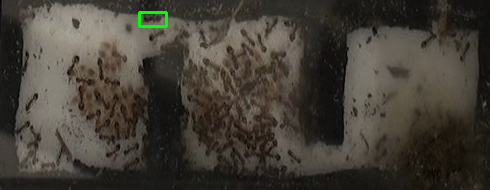

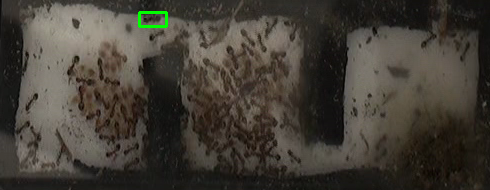

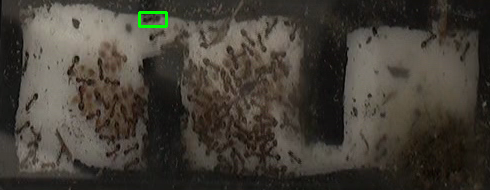

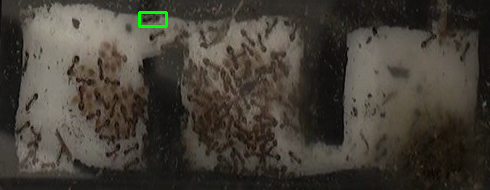

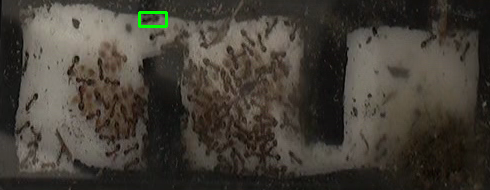

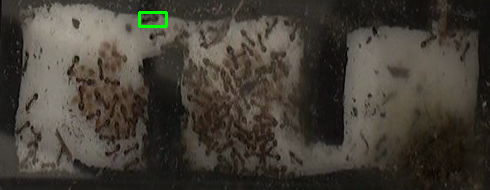

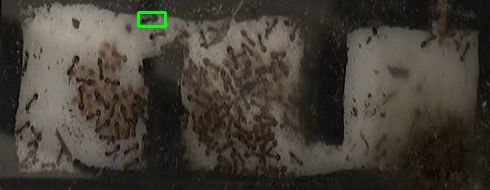

In [109]:
template = template_f2_210 # deja sur gray + reduction de bruit
for i in range(210,221):
  imgOri = cv.imread(f"img/img{i}.png")
  img = cp.deepcopy(imgOri)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  blur = cv.GaussianBlur(img, (7,7),0) #reduction de bruit


  tab_point = []

  
  for degree in np.arange(0,360,20):
    im_pivote = imutils.rotate(template, degree)
    h, w= im_pivote.shape

    res = cv.matchTemplate(blur, im_pivote, cv.TM_CCOEFF_NORMED)
    min_val, max_val, min_location, max_location = cv.minMaxLoc(res)
    if verif(max_location, tab_point) or tab_point == []:
      tab_point.append(max_location)
      cv.rectangle(imgOri, max_location, (max_location[0] +w, max_location[1]+h), (0,255,0),2)
      template = blur[max_location[1]:max_location[1]+h,max_location[0]:max_location[0] +w]
  cv2_imshow(imgOri)

Il a l'air prometteux, mais en testant sur une longue durée, les obstacles dans le nid jouent un rôle important dans le score de similarité.

#Compter par Edge

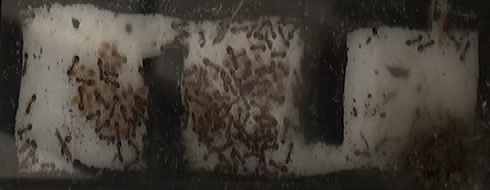

In [26]:
img = cv.imread("img/img2.png")
cv2_imshow(img)

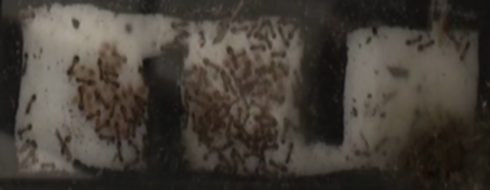

In [27]:
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(img, (5,5), 0)
cv2_imshow(blur)

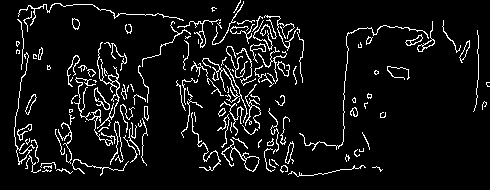

In [28]:
edges = cv.Canny(blur,50,100)
cv2_imshow(edges)

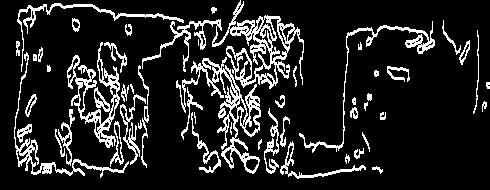

In [29]:
dilated = cv.dilate(edges, (1,1), iterations =2)
cv2_imshow(dilated)

Comptage: 53


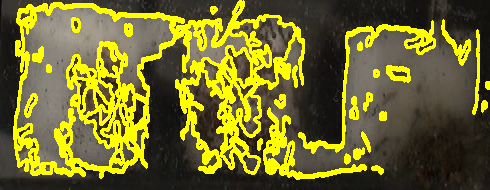

In [32]:
(ct, _) = cv.findContours(dilated.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(img, ct, -1, (0,255,255),2)
print("Comptage:",len(ct))
cv2_imshow(img)